In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as sgr
from analysis_tools import plot_trend

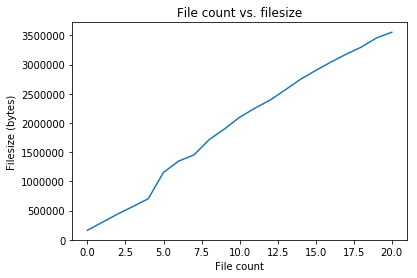

In [4]:
from pathlib import Path
p = Path('pieces')
sizes = [[x, x.stat().st_size] for x in sorted(p.glob('*'))]
sizes = pd.DataFrame(sizes)
sizes['total_size'] = sizes[1].cumsum()
fig, ax = plt.subplots()
ax.plot(sizes.index, sizes['total_size'])
ax.set_ylabel("Filesize (bytes)")
ax.set_xlabel("File count")
ax.set_title("File count vs. filesize")
ax.set_ybound(lower=0)

In [5]:
data = pd.read_csv("results-22-Mar-2018.csv", index_col=0)
data['host'] = 'rapi'
data['watts'] = .5*5
more_data = pd.read_csv("outputMac5.csv", index_col=0)
more_data['host'] = 'laptop'
more_data['watts'] = 27.52
data = pd.concat([data, more_data])
data['Ws_per_pi'] = data['watts']*data['time']
data['Ws'] = data['Ws_per_pi']*data['pi_count']
#data.groupby(['host','pi_count','file_count'])['Ws'].describe()

In [6]:
mod = smf.ols(formula='Ws ~ host:pi_count', data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ws   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     53.49
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           2.63e-21
Time:                        16:36:12   Log-Likelihood:                -3832.1
No. Observations:                 402   AIC:                             7670.
Df Residuals:                     399   BIC:                             7682.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3885.0035    401.011      9.688      0.000    3096.645    4673.362
host[laptop]:pi_count -2649.0018   1426.006     -1.858      0.064   -5452.427     154.423
host[rapi]:pi_count     948.3229    101.273      9.364      0.000     749.228    1147.418
==============================================================================
Omnibus:                        1.849   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.669
Skew:                           0.153   Prob(JB):                        0.434
Kurtosis:                       3.080   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,file_count,pi_count,time,timestamp,watts,Ws_per_pi,Ws
host,,,,,,,
laptop,6,6,6,6,6,6,6
rapi,396,396,396,396,396,396,396


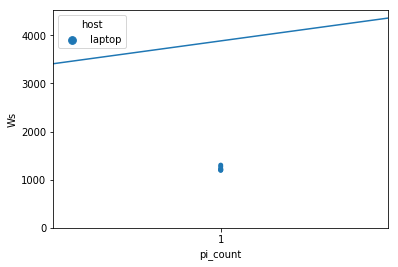

In [14]:
fig, ax = plt.subplots()
sns.stripplot(x='pi_count', y='Ws', hue='host', data=data.query('host == "laptop"'), ax=ax)
#ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
#ax.autoscale()
plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')
data.groupby('host').count()

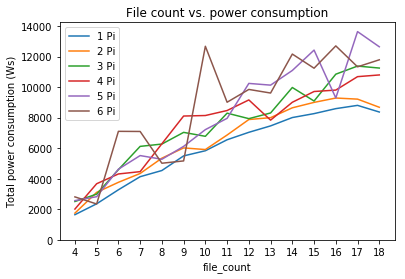

In [8]:
fig, ax = plt.subplots()
# sns.stripplot(x='file_count', y='Ws', hue='pi_count', data=data.loc[data['host'] == 'rapi'], ax=ax)
# ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
pidata = data.loc[data['host'] == 'rapi']
pidata = pidata.loc[pidata['file_count'] <= 18]
for count, grp in pidata.groupby('pi_count'):
    grp = grp.groupby('file_count').mean()
    line, = ax.plot(grp.index, grp['Ws'], '-')
    line.set_label(str(count) + " Pi")
ax.set_xlabel("file_count")
ax.set_ylabel("Total power consumption (Ws)")
ax.set_title("File count vs. power consumption")
ax.set_xticks(pidata['file_count'].unique())
ax.legend()
#plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')

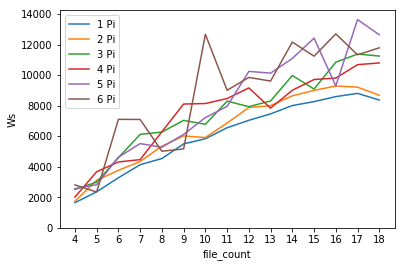

In [9]:
fig, ax = plt.subplots()
# sns.stripplot(x='file_count', y='Ws', hue='pi_count', data=data.loc[data['host'] == 'rapi'], ax=ax)
# ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
pidata = data.loc[data['host'] == 'rapi']
pidata = pidata.loc[pidata['file_count'] <= 18]
for count, grp in pidata.groupby('pi_count'):
    grp = grp.groupby('file_count').mean()
    line, = ax.plot(grp.index, grp['Ws'], '-')
    line.set_label(str(count) + " Pi")
ax.set_xlabel("file_count")
ax.set_ylabel("Ws")
ax.set_xticks(pidata['file_count'].unique())
ax.legend()
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')